<a href="https://colab.research.google.com/github/GunjanGrunge/SVHNNeuralNetwork/blob/main/nfl_big_data_bowl_2022_Neural_Network_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install -q kaggle

In [2]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gunjangrunge","key":"12c22c0a1b53b426a15f24413ac11977"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!ls ~/.kaggle

kaggle.json


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
pip show kaggle

Name: kaggle
Version: 1.5.12
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: six, requests, python-slugify, tqdm, urllib3, python-dateutil, certifi
Required-by: 


In [7]:
!kaggle competitions download nfl-big-data-bowl-2022

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 65.5MB/s]
 99% 269M/272M [00:01<00:00, 242MB/s]
100% 272M/272M [00:01<00:00, 244MB/s]
 96% 248M/259M [00:01<00:00, 125MB/s]
100% 259M/259M [00:01<00:00, 145MB/s]
 99% 249M/251M [00:01<00:00, 226MB/s]
100% 251M/251M [00:01<00:00, 226MB/s]
  0% 0.00/39.6k [00:00<?, ?B/s]
100% 39.6k/39.6k [00:00<00:00, 36.6MB/s]
  0% 0.00/304k [00:00<?, ?B/s]
100% 304k/304k [00:00<00:00, 96.0MB/s]
  0% 0.00/795k [00:00<?, ?B/s]
100% 795k/795k [00:00<00:00, 110MB/s]


In [2]:
missing_values = ["n/a", "na", "--","-"] 
import warnings
import tensorflow as tf
from tensorflow import keras 
tf.test.is_gpu_available()
import numpy             as np
import pandas            as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers,regularizers

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.



<FONT COLOR = TEAL>
<B> File descriptions </b>

    Game data: The games.csv contains the teams playing in each game. The key variable is gameId.

    Play data: The plays.csv file contains play-level information from each game. The key variables are gameId and playId.

    Player data: The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId.

    Tracking data: Files tracking[season].csv contain player tracking data from season [season]. The key variables are gameId, playId, and nflId.

    PFF Scouting data: The PFFScoutingData.csv file contains play-level scouting information for each game. The key variables are gameId and playId*



In [22]:
!unzip "/content/tracking2018.csv.zip"

Archive:  /content/tracking2018.csv.zip
  inflating: tracking2018.csv        


In [3]:
tracking2018= pd.read_csv('/content/tracking2018.csv', index_col=False)

In [158]:
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


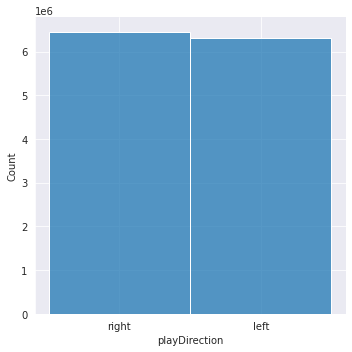

In [25]:
sns.set_style("darkgrid")
sns.displot(data=tracking2018, x="playDirection")

In [4]:
tracking2018.fillna(tracking2018.median())

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777346,2018-09-11T05:25:17.800,123.18,51.73,3.76,1.45,0.29,180.54,180.49,None,43398.0,football,43.0,NaN,football,59,2018091001,4033,right
12777347,2018-09-11T05:25:17.900,123.40,51.89,3.19,3.02,0.28,180.54,180.49,None,43398.0,football,43.0,NaN,football,60,2018091001,4033,right
12777348,2018-09-11T05:25:18.000,123.55,52.18,2.95,3.88,0.32,180.54,180.49,None,43398.0,football,43.0,NaN,football,61,2018091001,4033,right
12777349,2018-09-11T05:25:18.100,123.67,52.50,3.01,4.53,0.34,180.54,180.49,None,43398.0,football,43.0,NaN,football,62,2018091001,4033,right


In [159]:
tracking2018.isnull().sum()

time                  0
x                     0
y                     0
s                     0
a                     0
dis                   0
o                555537
dir              555537
event                 0
nflId            555537
displayName           0
jerseyNumber     555537
position         555537
team                  0
frameId               0
gameId                0
playId                0
playDirection         0
dtype: int64

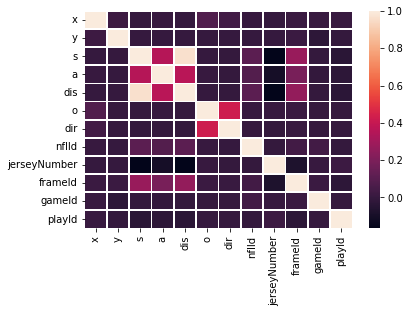

In [14]:
ax = sns.heatmap(tracking2018.corr(), linewidth=0.8)
plt.show()

Corr between S,A, dis, dir Frame id seems to be 
convincing 

---

Considering playDirection as our target variable we will keep the coorelated columns for further processing. 



In [5]:
tracking2018.drop(['x','y','jerseyNumber','gameId','playId','time','event','displayName','team'], axis='columns', inplace=True)

In [7]:
tracking2018['o'].fillna(tracking2018.o.median(), inplace = True)  
tracking2018['nflId'].fillna(tracking2018.nflId.median(), inplace = True)  
tracking2018['dir'].fillna(tracking2018.dir.mean(), inplace = True)  

In [8]:
tracking2018.describe()

,s,a,dis,o,dir,nflId,frameId
count,1.277735e+07,1.277735e+07,1.277735e+07,1.277735e+07,1.277735e+07,1.277735e+07,1.277735e+07
mean,3.881972e+00,1.739485e+00,3.944878e-01,1.799730e+02,1.799976e+02,4.254675e+04,4.707462e+01
std,3.424896e+00,1.572912e+00,3.630697e-01,9.688194e+01,9.663434e+01,3.522530e+03,3.374721e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.121300e+04,1.000000e+00
25%,8.300000e-01,6.300000e-01,9.000000e-02,9.173000e+01,9.164000e+01,4.061500e+04,2.100000e+01
50%,3.310000e+00,1.410000e+00,3.300000e-01,1.805400e+02,1.799976e+02,4.339800e+04,4.100000e+01
75%,6.480000e+00,2.490000e+00,6.500000e-01,2.679200e+02,2.682300e+02,4.504600e+04,6.700000e+01
max,4.832000e+01,6.378000e+01,5.307000e+01,3.600000e+02,3.600000e+02,4.701600e+04,4.730000e+02


In [9]:
one_hot = pd.get_dummies(tracking2018['position'])

In [10]:
tracking2018 = tracking2018.drop('position',axis = 1)

In [11]:
tracking2018 = tracking2018.join(one_hot)
tracking2018['playDirection'] = tracking2018['playDirection'].astype('bool') 

In [13]:
tracking2018.head()

,s,a,dis,o,dir,nflId,frameId,playDirection,C,CB,DB,DE,DL,DT,FB,FS,G,HB,ILB,K,LB,LS,MLB,NT,OG,OLB,OT,P,QB,RB,S,SS,T,TE,WR
0,4.36,1.33,0.43,130.42,128.44,39470.0,1,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.59,1.24,0.45,128.59,127.81,39470.0,2,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.74,0.99,0.47,124.47,128.15,39470.0,3,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.87,0.71,0.48,126.02,127.35,39470.0,4,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.96,0.79,0.50,131.71,124.75,39470.0,5,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
tracking2018.isnull().sum()

s                0
a                0
dis              0
o                0
dir              0
nflId            0
frameId          0
playDirection    0
C                0
CB               0
DB               0
DE               0
DL               0
DT               0
FB               0
FS               0
G                0
HB               0
ILB              0
K                0
LB               0
LS               0
MLB              0
NT               0
OG               0
OLB              0
OT               0
P                0
QB               0
RB               0
S                0
SS               0
T                0
TE               0
WR               0
dtype: int64

In [15]:
X = tracking2018.drop("playDirection", axis=1)
y = tracking2018['playDirection']

In [16]:
# splitting into training and testing
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30)

In [17]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20)

In [18]:
datashape = X_train.shape
datashape

(7155316, 34)

In [19]:
# Input Layer
#Adding Input layer and activation functions ReLU
nn_reg = Sequential([
                     Dense(34, activation ='relu',input_shape= (34, ))])

In [20]:
nn_reg.add(Dense(34, activation ='relu'))
nn_reg.add(Dense(17, activation ='relu'))
nn_reg.add(Dense(8, activation ='relu'))
nn_reg.add(Dense(4, activation ='relu'))
nn_reg.add(Dense(2, activation ='relu'))
nn_reg.add(Dense(1, activation ='softmax'))

In [21]:
nn_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 34)                1190      
_________________________________________________________________
dense_1 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_2 (Dense)              (None, 17)                595       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 144       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [22]:
nn_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])

In [23]:
print(y_train)

5449439     True
8830490     True
3355162     True
10540288    True
6128596     True
            ... 
2103109     True
529588      True
3358043     True
4188317     True
9493185     True
Name: playDirection, Length: 7155316, dtype: bool


In [25]:
nn_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=5, batch_size=1000)

Epoch 1/5
7156/7156 [==============================] - 24s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
7156/7156 [==============================] - 23s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
7156/7156 [==============================] - 23s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
7156/7156 [==============================] - 23s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
7156/7156 [==============================] - 23s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


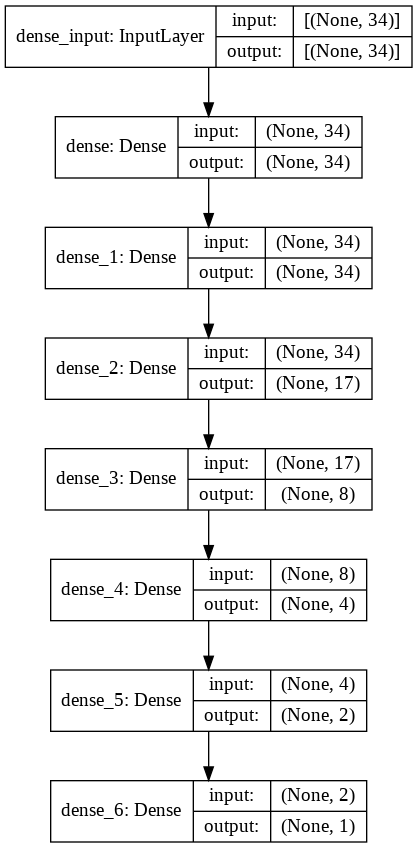

In [27]:
tf.keras.utils.plot_model(nn_reg, show_shapes=True)


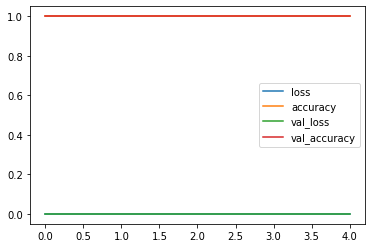

In [28]:

losses = pd.DataFrame(nn_reg.history.history)
losses.plot()


<font color = red> <b> This surely is an overfit data, however we can further use the logic to combine multiple NN to drive at an outcome after the target variable is decied. 


we can futher feature engineer other sets and find out the best possible combination of NN to give out the desired output. 